Author: Nicolas Legrand nicolas.legrand@cfin.au.dk

In [1]:
%%capture
! pip install git+https://github.com/LegrandNico/metadPy.git
! pip install numpyro

In [30]:
import numpy as np
import pandas as pd
import arviz as az
import numpyro
from metadPy.bayesian import hmetad
from metadPy import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

# Set the number of cores used by Numpyro here
numpyro.set_host_device_count(2)

# Single subject

In [3]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

## Using metadPy.

In [4]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2, backend="numpyro")

## Using HMeta-d

The results were generated by the `example_metad_indiv.R` file.

In [21]:
hmetad_df = pd.read_csv('/hmetad/metad_indiv.txt', sep="\t")

## Comparison

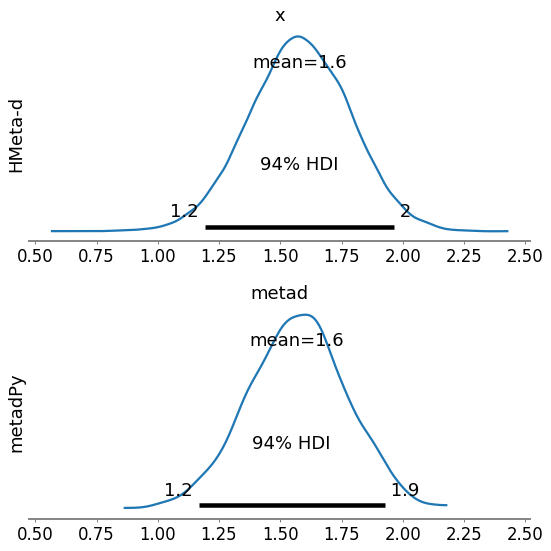

In [44]:
_, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
az.plot_posterior(hmetad_df.meta_d.to_numpy(), ax=axs[0]);
az.plot_posterior(traces, var_names=["metad"], ax=axs[1]);

axs[0].set_ylabel("HMeta-d")
axs[1].set_ylabel("metadPy")

plt.tight_layout()

# Group level